# ME5311 Your first CFD problem 

This example solves a steady-state 1D conduction problem. From a partial differential equation point of view, the equation is elliptic. The discretization in the example is based on the finite-volume method. 

The program is structured as follows, which is a recommendated form of programming when solving physical problems. 

1. List all the physical parameters % L, k, q, TA, TB
2. Define all the numerical paramters % N, dx, cell center location x(N)
3. Setting up A matrix: first setting up the interior points, then boundary points
4. Setting up b vector: first setting up the interior points, then boundary points
5. Solve for T
6. Plot T as a function of x, and potentially compared with analytical solutions. 

In [65]:
## Load necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [66]:
##Physical and numerical parameters
L = 0.02; # m, length of the 1D domain
k = 0.5; # W/mK, thermal conductivity of the material
q = 1000000; # W/m3, volumetric heat release rate
TA = 100; #Celsius, left boundary at fixed temperature
TB = 200; #Celsius, right boundary at fixed temperature
## Numerical Paramteres
N = 5; # number of cells during discretization 
dx = L/N; # length of each computational cell
Xc = np.zeros(N); # coordinates at the center of each cell
for i in range(0, N):
        Xc[i] = i*dx + 0.5*dx

qsrc=np.zeros(N);

for i in range(0,N):
    qsrc[i] = q; # A constant heat source term for the conduction problem
   
print(qsrc)

[1000000. 1000000. 1000000. 1000000. 1000000.]


In [67]:
## Set up the A matrix. 
## Note that A is a mostly zero (sparse matrix), so we first fill A with all zero entries. 
A = np.zeros((N,N));
for i in range(1,N-1):
    A[i,i] = -2*k/dx;
    A[i,i+1] = k/dx; # The first index indicates cell ID
    A[i,i-1] = k/dx; # The second index indicates the cells involved
# for left boundary
A[0,0] = -3*k/dx;
A[0,1] = k/dx;
# for right boundary
A[N-1,N-1] = -3*k/dx;
A[N-1,N-2] = k/dx;
#print(A)

In [68]:
## Set up b vector
b=np.zeros(N);
for i in range(1,N-1):
    b[i] = -qsrc[i]*dx;
#left boundary
    b[0] = -qsrc[0]*dx - 2*k*TA/dx;
#right boundary
    b[N-1] = -qsrc[N-1]*dx -2*k*TB/dx;
#print(b)

In [69]:
# solve for Temperature
T = np.linalg.solve(A,b)
#print(T)

In [70]:
# analytical solution for steady-state 1D conduction with a constant source q
def analytical_solution(x,q,L,k,TA,TB):
    return -q/2/k*x*x + (TB-TA+q*L*L/2/k)*x/L+TA

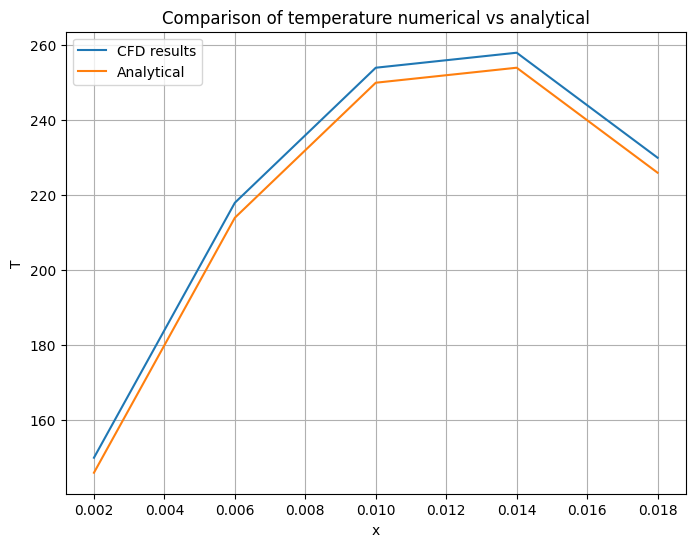

In [71]:
# plot the results 
analytical_results = analytical_solution(Xc,q,L,k,TA,TB) 
plt.figure(figsize=(8, 6))
plt.plot(Xc, T, label='CFD results')
plt.plot(Xc, analytical_results, label='Analytical') 

plt.xlabel('x')
plt.ylabel('T')
plt.title('Comparison of temperature numerical vs analytical')
plt.legend()
plt.grid()
plt.show()

## Exercise 1 
Increase the number of cells by changing the parameter in the first block and observe the agreement between the analytical and numerical solution.

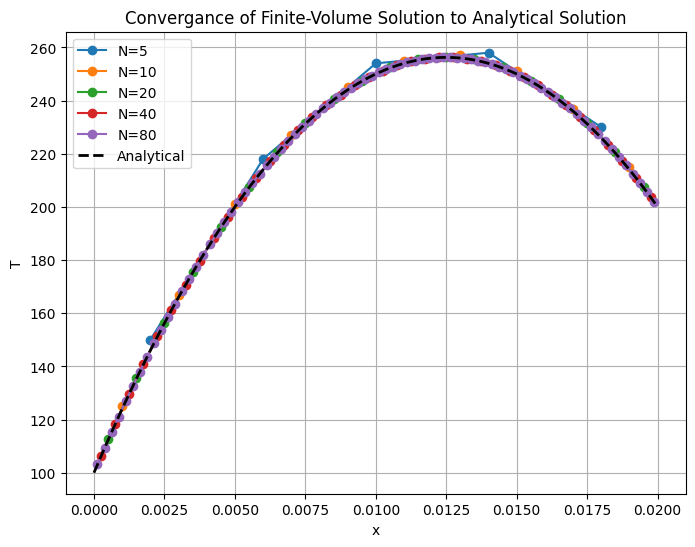

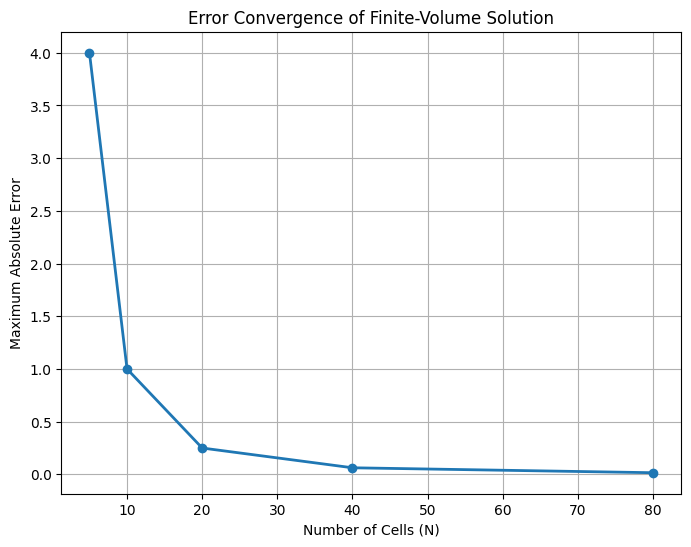

In [72]:
import numpy as np
import matplotlib.pyplot as plt

##Physical and numerical parameters
L = 0.02; # m, length of the 1D domain
k = 0.5; # W/mK, thermal conductivity of the material
q = 1000000; # W/m3, volumetric heat release rate
TA = 100; #Celsius, left boundary at fixed temperature
TB = 200; #Celsius, right boundary at fixed temperature

## Numerical Paramteres
N_vals = [5, 10, 20, 40, 80]; # number of cells during discretization 

plt.figure(figsize=(8,  6))

errors = []

for N in N_vals:
    dx = L/N; # length of each computational cell

    Xc = np.zeros(N); # coordinates at the center of each cell
    for i in range(0, N):
            Xc[i] = i*dx + 0.5*dx

    qsrc=np.zeros(N);
    for i in range(0,N):
        qsrc[i] = q; # A constant heat source term for the conduction problem

    ## Set up the A matrix. 
    ## Note that A is a mostly zero (sparse matrix), so we first fill A with all zero entries. 
    A = np.zeros((N,N));
    for i in range(1,N-1):
        A[i,i] = -2*k/dx;
        A[i,i+1] = k/dx; # The first index indicates cell ID
        A[i,i-1] = k/dx; # The second index indicates the cells involved
    # for left boundary
    A[0,0] = -3*k/dx;
    A[0,1] = k/dx;
    # for right boundary
    A[N-1,N-1] = -3*k/dx;
    A[N-1,N-2] = k/dx;

    ## Set up b vector
    b=np.zeros(N);
    for i in range(1,N-1):
        b[i] = -qsrc[i]*dx;
    #left boundary
    b[0] = -qsrc[0]*dx - 2*k*TA/dx;
    #right boundary
    b[N-1] = -qsrc[N-1]*dx -2*k*TB/dx;

    # solve for Temperature
    T_num = np.linalg.solve(A,b)
    #print(T)

    T_exact = analytical_solution(Xc,q,L,k,TA,TB)

    error = np.abs(T_num - T_exact)
    errors.append(np.max(error))

    plt.plot(Xc, T_num, 'o-', label=f'N={N}')

x_smooth = np.linspace(0, L, 1000)
T_smooth = analytical_solution(x_smooth, q, L, k, TA, TB)  
plt.plot(x_smooth, T_smooth, 'k--', linewidth=2, label='Analytical')

plt.xlabel('x')
plt.ylabel('T')
plt.title('Convergance of Finite-Volume Solution to Analytical Solution')
plt.legend()
plt.grid()
plt.show()

#Plot error vs N
plt.figure(figsize=(8, 6))
plt.plot(N_vals, errors, 'o-', linewidth=2)
plt.xlabel('Number of Cells (N)')
plt.ylabel('Maximum Absolute Error')
plt.title('Error Convergence of Finite-Volume Solution')
plt.grid()
plt.show()

We can clearly see that the simulation becomes more accurate as we increase the fidelity of the mesh. However, as mentioned in the reading materials, if one were using an explicit method for a 1D transient conduction problem, in order to maintain stability, the time step, $\Delta t$, must be smaller than $\left(\frac{(\Delta x)^2}{2\alpha}\right)$. Therefore, decreasing the mesh size (in cases of the explicit method) significantly constrains the allowable time step. In instances where constraining the time step is not desired, one may prefer to use the implicit method. Finally, increasing the fidelity of the mesh will also result in an increase in required computing power.

## Exercise 2
Modify the code to accomodate a convection boundary condition on the left hand side: convective heat transfer coefficient is 100 W/m2K and free stream temperature is 60 C. TA is unknown under the convective boundary condition. Hint: re-derive the discretized equation for cell 1 (the first cell on the left) and modify A and b to accomodate the solution. 

In order to modify the code to accommodate for a convection boundary condition on the left hand side, we must re-derive the discretized balance for the first cell, $A_{0,0}$. Doing so yields:

$$
h(T_0 - T_\infty) + \frac{k}{\Delta x}(T_1 - T_0) + q\Delta x = 0
$$

We want to write this in some  form of $\left(A_{0,0}\right)T_0 + \left(A_{0,1}\right)T_1 = b_0$, so we can re-write the equation above as:

$$
-\left(\frac{k}{\Delta x} + h\right)T_0 + \frac{k}{\Delta x}T_1 = -q \Delta x - hT_\infty
$$

Therefore, we have:

$$
A_{0,0} = -\left(\frac{k}{\Delta x} + h\right), \quad A_{0,1} = \frac{k}{\Delta x}, \quad b_{0} = -q \Delta x - hT_\infty
$$

which can now be implemented into our code along with defining the ambient temperature and convective heat transfer coefficient:

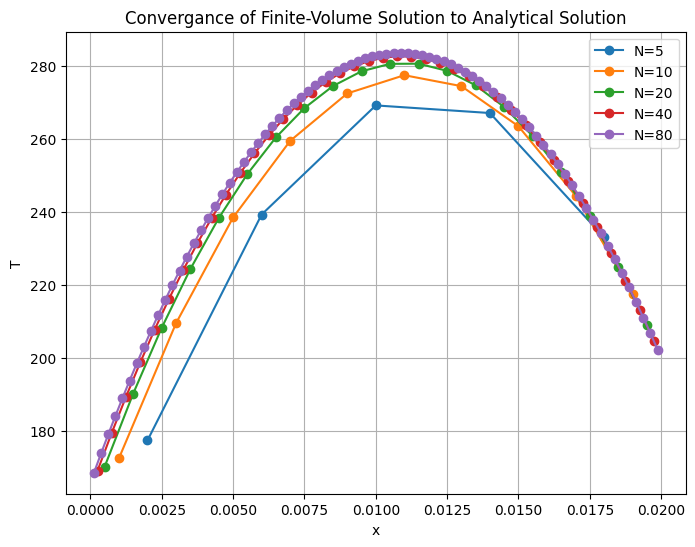

In [73]:
import numpy as np
import matplotlib.pyplot as plt

##Physical and numerical parameters
L = 0.02; # m, length of the 1D domain
k = 0.5; # W/mK, thermal conductivity of the material
q = 1000000; # W/m3, volumetric heat release rate
#TA = 100; #Celsius, left boundary at fixed temperature
TB = 200; #Celsius, right boundary at fixed temperature
h = 100.0 # [W/m2K] convective heat transfer coefficient for the Robin boundary condition at the left boundary
T_inf = 60.0 #Celsius, ambient temperature for the Robin boundary condition at the left boundary

## Numerical Paramteres
N_vals = [5, 10, 20, 40, 80]; # number of cells during discretization 

plt.figure(figsize=(8,  6))

errors = []

for N in N_vals:
    dx = L/N; # length of each computational cell

    Xc = np.zeros(N); # coordinates at the center of each cell
    for i in range(0, N):
            Xc[i] = i*dx + 0.5*dx

    qsrc=np.zeros(N);
    for i in range(0,N):
        qsrc[i] = q; # A constant heat source term for the conduction problem

    ## Set up the A matrix. 
    ## Note that A is a mostly zero (sparse matrix), so we first fill A with all zero entries. 
    A = np.zeros((N,N));
    for i in range(1,N-1):
        A[i,i] = -2*k/dx;
        A[i,i+1] = k/dx; # The first index indicates cell ID
        A[i,i-1] = k/dx; # The second index indicates the cells involved
    # for left boundary
    A[0,0] = -k/dx - h; # Robin boundary condition
    A[0,1] = k/dx;
    # for right boundary
    A[N-1,N-1] = -3*k/dx;
    A[N-1,N-2] = k/dx;

    ## Set up b vector
    b=np.zeros(N);
    for i in range(1,N-1):
        b[i] = -qsrc[i]*dx;
    #left boundary
    b[0] = -qsrc[0]*dx - h*T_inf; # Robin boundary condition
    #right boundary
    b[N-1] = -qsrc[N-1]*dx -2*k*TB/dx;

    # solve for Temperature
    T_num = np.linalg.solve(A,b)
    #print(T)
    plt.plot(Xc, T_num, 'o-', label=f'N={N}')

plt.xlabel('x')
plt.ylabel('T')
plt.title('Convergance of Finite-Volume Solution to Analytical Solution')
plt.legend()
plt.grid()
plt.show()


In exercise one, the left boundary condition forced the temperature of the left face (x = 0.0) to $100^\circ\text{C}$. Here, we can see that at the left face (and maximum, x ~ 0.01125 for this case) temperature is higher. This is because the temperature of the left face is no longer fixed, instead it depends on the internal heat generation and the rate of heat removal. In this case, it is less efficient at removing heat than the fixed boundary condition. We can confirm this by increasing h, and observing that when we do so, the temperature at the left face approaches the ambient temperature of $60^\circ\text{C}$. We can also confirm our code is working properly by decreasing h, and watching the peak temperature shift left, as the left boundary condition begins to act as an insulated wall. 

Now, to increase the simulations accuracy, we can account for for conduction through the first half of the cell at the left boundary to account. We can write the energy balance at the left face as:

$$
-h(T_{\infty} - T_A) = q = \frac{2k}{\Delta x}\left(T_A - T_0\right)
$$

$$
h(T_A - T_{\infty}) = q = -\frac{2k}{\Delta x}\left(T_0 - T_A\right)
$$




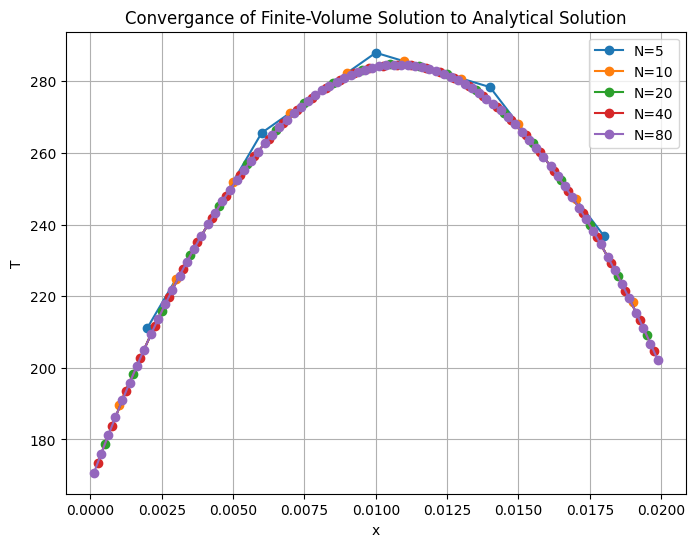

In [74]:
import numpy as np
import matplotlib.pyplot as plt

##Physical and numerical parameters
L = 0.02; # m, length of the 1D domain
k = 0.5; # W/mK, thermal conductivity of the material
q = 1000000; # W/m3, volumetric heat release rate
#TA = 100; #Celsius, left boundary at fixed temperature
TB = 200; #Celsius, right boundary at fixed temperature
h = 100.0 # [W/m2K] convective heat transfer coefficient for the Robin boundary condition at the left boundary
T_inf = 60.0 #Celsius, ambient temperature for the Robin boundary condition at the left boundary


## Numerical Paramteres
N_vals = [5, 10, 20, 40, 80]; # number of cells during discretization 

plt.figure(figsize=(8,  6))

errors = []

for N in N_vals:
    dx = L/N; # length of each computational cell

    k_eff = 1/((1/h) + (dx/(2*k))) # effective thermal conductivity for the Robin boundary condition at the left boundary

    Xc = np.zeros(N); # coordinates at the center of each cell
    for i in range(0, N):
            Xc[i] = i*dx + 0.5*dx

    qsrc=np.zeros(N);
    for i in range(0,N):
        qsrc[i] = q; # A constant heat source term for the conduction problem

    ## Set up the A matrix. 
    ## Note that A is a mostly zero (sparse matrix), so we first fill A with all zero entries. 
    A = np.zeros((N,N));
    for i in range(1,N-1):
        A[i,i] = -2*k/dx;
        A[i,i+1] = k/dx; # The first index indicates cell ID
        A[i,i-1] = k/dx; # The second index indicates the cells involved
    # for left boundary
    A[0,0] = -k/dx - k_eff; # Robin boundary condition
    A[0,1] = k/dx;
    # for right boundary
    A[N-1,N-1] = -3*k/dx;
    A[N-1,N-2] = k/dx;

    ## Set up b vector
    b=np.zeros(N);
    for i in range(1,N-1):
        b[i] = -qsrc[i]*dx;
    #left boundary
    b[0] = -qsrc[0]*dx - k_eff*T_inf; # Robin boundary condition
    #right boundary
    b[N-1] = -qsrc[N-1]*dx -2*k*TB/dx;

    # solve for Temperature
    T_num = np.linalg.solve(A,b)
    #print(T)
    plt.plot(Xc, T_num, 'o-', label=f'N={N}')

plt.xlabel('x')
plt.ylabel('T')
plt.title('Convergance of Finite-Volume Solution to Analytical Solution')
plt.legend()
plt.grid()
plt.show()


If we compare this with the results of how we previously modeled the convective left boundary condition, we can see that as N increases for the previous model above, the answer gets closer to what we see here (and the analytical solution). This is because as dx gets smaller, so does the error induxed by ignoreing conduction between the wall and the initial node. We can see that the most recent version of the code is more accurate at low N, therefore saving us computational time/resources. PROOFREAD